# Lección 5: Cálculo Vectorial
## Gráficas 3D e Implementación de Cuadratura Gaussiana

### Objetivos:

1. Conocer los elementos vectoriales básicos con los que se puede trabajar en Python.
2. Implementar la Cuadratura Gaussiana haciendo uso de los anteriores.

### 1. Algunas gráficas clásicas del Cálculo Multivariado.
#### 1.1. La Hélice.
Podemos graficar una de las curvas tridimensionales más conocidas de forma muy sencilla haciendo uso de las poderosas librerías disponibles en Python. Estudiemos el problema de graficar la curva paramétrica:
$$x(t)=cos(t) \\
y(t)=sin(t) \\
z(t)=t$$

comúnmente conocida como la hélice, la cual es el resultado de hacer al círculo 2-dimensional una función de una componente de altura.

Populating the interactive namespace from numpy and matplotlib


C:\Users\Alberto\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


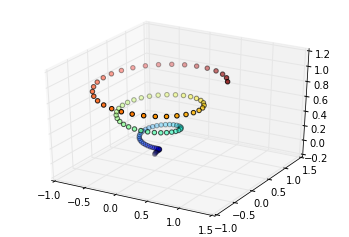

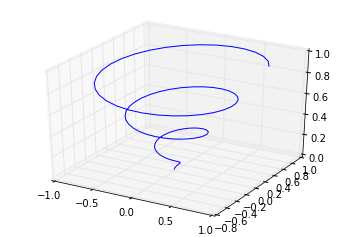

In [2]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = z

ax.scatter(x, y, z, c=c)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x, y, z, '-b')

#### 1.2. El Cilindro.
El cilindro corresponde a barrer el eje z con un círculo de radio fijo. El lugar geométrico en coordenadas cartesianas por:
$$x^2+y^2 = r , r>0 $$


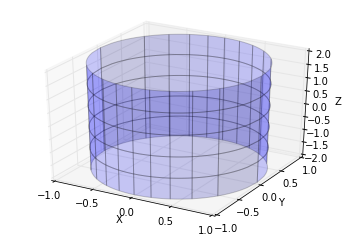

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=np.linspace(-1, 1, 100)
z=np.linspace(-2, 2, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)


rstride = 20
cstride = 10
ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)
ax.plot_surface(Xc, -Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

#### 1.3. El Atractor de Lorenz
El atractor de Lorenz es un sistema dinámico tridimensional descubierto por Edward Lorenz mientras estudiaba la convección en la atmósfera terrestre. El sistema dinámico que lo describe es el siguiente:
$$ \frac{dx}{dt} = a ( y - x ) \\
\frac{dy}{dt} = x ( b - z ) - y \\
\frac{dz}{dt} = xy - cz$$
A continuación se presenta su gráfica:

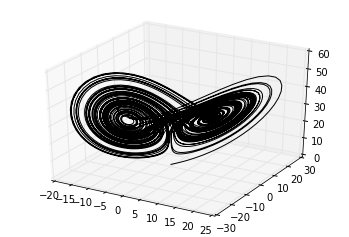

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

a, b, c = 10., 28., 8. / 3.

def lorenz_map(X, dt = 1e-2):
 X_dt = np.array([a * (X[1] - X[0]),
 X[0] * (b - X[2]) - X[1],
 X[0] * X[1] - c * X[2]])
 return X + dt * X_dt

points = np.zeros((10000, 3))

X = np.array([.1, .0, .0])
for i in range(points.shape[0]):
 points[i], X = X, lorenz_map(X)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot(points[:, 0], points[:, 1], points[:, 2], c = 'k')
plt.show()

### 1.4. Campo Escalar
Podemos graficar un campo escalar de forma bastante sencilla ocupando las librerías matplotlib y mpl_toolkits. A continuación se presenta una superficie 3 dimensional de un círculo.

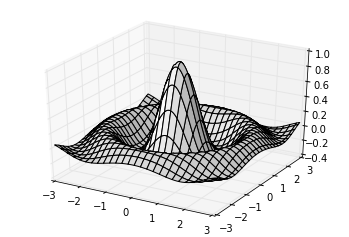

In [16]:
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 256)
y = np.linspace(-3, 3, 256)
X, Y = np.meshgrid(x, y)
Z = np.sinc(np.sqrt(X ** 2 + Y ** 2))
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z, color='w')
plt.show()

#### 1.5. El Toro.
El toro, o la dona, es una de las figuras paramétricas más famosas. La superficie está descrita por la ecuación:
$$
x = (R + r cos\alpha )cos \beta \\
y = (R + r cos\alpha ) sin \beta \\
z = rsin \alpha
$$
donde R representa el radio exterior, r el radio interior, $ \alpha $ la latitud respecto del eje xz y $ \beta $ el ángulo de rotación alrededor del eje z.

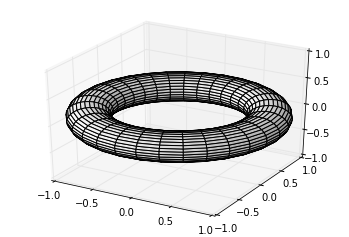

In [17]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)
# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color = 'w', rstride = 1, cstride = 1)
plt.show()

### 2. Elementos de Cálculo Vectorial
#### 2.1. Cálculo de la longitud de Arco.
Uno de los elementos esenciales del cálculo vectorial corresponde al cálculo de la longitud de arco de una curva en el espacio. Para ello, podemos emplear las poderosas librerías de Python y hacer los cálculos de forma bastante sencilla.

Sea $\vec(r): [a,b] \Rightarrow \mathbb(R)^3$ una $\mathcal(C)^1$-parametrización de una curva seccionalmente regular $\gamma$. Denotemos por $\mathcal{P}$ una partición de $[a , b]$ dada por:
$$ \mathcal{P}={a=t_0, t_1, t_2, ..., t_n = b} $$
\Denotemos además $\Delta t_i = t_i - t_{i-1}$ para $i = 1, 2, ..., n$  y $\delta = \delta (\mathcal{P})=max_{i}(t_i-t_i-1)$. Si $\mathcal{P}_n(\delta)$ es la poligonal que se obtiene al unir los puntos $\vec{r}(t_i)$ con $\vec{t_{i+1}}, i=0, 1, ...,n-1$, entonces mientras más pequeño sea $\delta$, mejor será la aproximación de $\gamma$ mediante la longitud de la poligonal $\mathcal{P}_n(\delta)$:
$$ l(\mathcal{P}_n(\delta)) = \sum_{i=1}^n\Vert \vec{r}(t_i)-\vec{r}(t_{i-1})\Vert = \sum_{i=1}^n \Vert \frac{\vec{r}(t_i)-\vec{r}(t_i-1}{t_i-t_{i-1}}\Vert \Delta t_i $$
Luego, tomando $\delta \Rightarrow 0$ se obtiene la longitud de la curva $\gamma$:
$$ l ( \mathcal{P}_n (\delta) ) \Rightarrow l( \gamma ) = \int_{a}^b \Vert \frac{d\vec{r}}{dt}(t)\Vert dt$$
Otra forma de expresar lo anterior es dada una función $f(x)$ continua en $[a, b]$. En longitud de curva desde a hasta b es:
$$ L = \int_a^b \sqrt{1+(f'(x))^2}dx $$
Si la curva viene dada de forma paramétrica por $x = x(t), y = y(t)$ y $a = x(\alpha), b = x ( \beta ), t \in [\alpha , \beta]$, entonces podemos hacer el siguiente cambio de variable:
$$ x = x(t) , dx = x'(t)dt $$ $$ f'(x) = \frac{dy}{dx} = \frac{dy}{dt} \frac{dt}{dx} = \frac{dy / dt}{dx / dt} = \frac{y'(t)}{x'(t)} $$
$$ \Rightarrow L = \int_{a}^b \sqrt{1 + (f'(x))^2}dx = \int_{\alpha}^{\beta} \sqrt{1 + ( \frac{y'(t)}{x'(t)} )^2}x'(t)dt = \int_{\alpha}^{\beta} \sqrt{(x'(t))^2+(y'(t))^2}dt $$

#### Ejemplo:

Desarrolle un programa para calcular la longitud de arco de la cicloide:
$$ x = k(t-sen(t)), y = k(1- cos(t)), t \in [0, 2\pi] $$ con k constante real positiva.

In [21]:
from scipy import integrate

k = 1.2
t0 = 0
tn = 2 * math.pi
x2 = lambda z: k ** 2 * (1 - cos(z))**2 + (sin (z)) ** 2 
integrate.quad(x2, t0, tn)

(16.7132729170977, 2.8165952405859034e-10)

Para el cálculo de la integral anterior se utilizó la poderosa librería integrate de scipy la cual permite a través del método de cuadratura gaussiana el cálculo numérico de una integral dada.

#### Desafío: 
Extienda el código anterior para crear una función para el cálculo del área para valores arbitrarios de inicio y fin tanto como de forma k.

#### 2.2. Integración simbólica de Integrales de linea.
¿Qué es posible hacer en el caso de que se quisiese utilizar Python para comprobar un resultado teórico y no numérico de una Integral de linea?. La respuesta se encuentra en la librería SimPy, la cual permite realizar cálculos simbólicos en el lenguaje. En particular en el caso de la integración el módulo integrate nos permitirá calcular tanto integrales definidas como indefinidas. A continuación se presenta un breve ejemplo de como utilizar la librería anterior.


#### Ejemplo: 
Calcule la integral de linea de la función $f( x, y ) = x^2y^2$ sobre una circunferencia de radio unitario.

In [5]:
from simpy import *
t, x, y = symbols("t, x, y")
C = Curve([cos(t), sin(t)], (t, 0, 2 * pi))
line_integrate(x**2 * y**2, C, [x, y])

NameError: name 'symbols' is not defined

#### 2.3. Integración Múltiple
Para evaluar integrales en dimensiones Python dispone de las poderosas extensiones de la cuadratura. La sintaxis para llamar a cada librería corresponde a a dblquad y tplquad para el caso dos dimensional y tres dimensional respectivamente contenidos en SciPy. En el caso de una integral n-dimensional es posible extender el método a través del módulo nquad para integrales de la forma $\int...\int_D f(\vec{x})d\vec{x}$ sobre un dominio $D$ apropiado. 

En el caso de la integración doble, dblquad puede ser utilizada para cálculo de integrales de la forma $\int_a^b\int_{g(x)}^{h(x)}f(x,y)dxdy$ mediante la sintaxis $dblquad(f,a,b,g,h)$ donde tanto $f, g, h$ son funcions y $a, b$ constantes.

#### Ejemplo:
Calcule la integral de la función $\exp^{-(x^2+y^2)}$ sobre un cuadrado unitario centrado en el origen.

In [8]:
import matplotlib as plt
import numpy as np
from scipy import integrate


def f(x, y):
    return np.exp(-x**2-y**2)
fig, ax = plt.subplots(figsize=(6,5))
x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np-meshgrid(x, y)
c = ax.contour(X, Y, f(X,Y), 15, cmap = mpl.cm.RdBu, vmin = -1, vmax = 1)
bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor = "grey")
ax.add_patch(bound_rect)
ax.axis('tight')
ax.set_xlabel('$x$', fontsize = 18)
ax.set_ylabel('$y$', fontsize = 18)


AttributeError: 'module' object has no attribute 'subplots'

En la ventana anterior se muestra la región de integración en la que trabajaremos. A continuación se presenta el código para la integración.

In [11]:
import matplotlib as plt
import numpy as np
from scipy.integrate import dbquad


def f(x, y):
    return np.exp(-x**2-y**2)

a, b = 0, 1
g = lambda x : 0
h = lambda x : 1

dbquad(f, a, b, g, h)


ImportError: cannot import name dbquad

## Anexo
### El Método de Cuadratura Gaussiana.
El método de Cuadratura gaussiana es uno de las técnicas numéricas más utilizadas para la aproximación de integración definida de funciones. Consiste esencialmente en la utilización de polinomios de orden superior para la aproximación de la función que se desea aproximar. El método esencialmente consiste en aproximar la integral mediante:

$$ I_n(f)=\sum_{j=1}^n w_{j,n}f(x_j, n)=\int_a^bw(x)f(x)dx $$

donde a la función $w_{j,n}$ se les denomina **pesos** y son no negativos e integrables en el intervalo $[a,b]$. Además a los puntos $x_{j,n}$ se les denomina **nodos** en el intervalo $[a,b]$. La idea esencial es escoger tanto a los pesos como a los nodos de forma que $I_n(f)$ sea igual a $I(f)$ para polinomios de alto grado.

Para tener una idea intuitiva de como construir el polinomio $I_n(f)$ estudiemos el caso especial de calcular la integral:

$$\int_{-1}^1f(x)dx=\sum_{j=1}^nw_jf(x_j)$$

donde $w(x)=1$. Una forma de escoger los pesos y nodos es buscando minimizar el error al n-ésimo paso:

$$E_n(f)=\int_{-1}^1f(x)dx-\sum_{j=1}^nw_jf(x_j)

para la $f(x)$ más grande. Para derivar ecuaciones primero note que:

$$ E_n(a_0+a_1x+a_2x^2+...+a_mx^m )=a_0E_n(1)+a_1E_n(x)+...+a_mE_n(x^m) $$

es decir, el error es un operador lineal. Así, ser+a $E_n(f)=0$ para todo polinomio de grado menor igual a m si, y solo si:

$E_n(xî)=0, \forall i=0,1,...,m$

Se distinguen entonces los siguientes casos:

####**Caso 1**: n=1. Dado que hay dos parámetros por determina: **w_1** y **x_1**, se debe pedir:

$$ E_n(1)=0  $$ y $$ E_n(x)=0 $$

Es decir:

$$ \int_{-1}^11dx=w_1=0 $$ $$ \int_{-1}1xdx-w_1x_1=0 $$
$$ \Rightarrow w_1=2 \;\; y \;\; x_1=0$$.
$$ \int_{-1}^1f(x)dx=2f(0) $$

Lo que no es más que la regla del punto medio.

####**Caso 2**: n=2.  En éste caso debemos determinar **$w_1,w_2, x_1, x_2$** por lo que se requieren 4 restricciones sobre:

$$ E_n(x^i)=\int_{-1}^1x^idx-[w_1x^i_1+w_2x^i_2 ]=0, i=0, 1, 2, 3 $$

o, equivalentemente:

$$ w_1+w_2=2 $$
$$ w_1x_1+w_2x_2=0 $$
$$ w_1x_1^2+w_2x_2^2=\frac{2}{3}$$
$$ w_1x_1^3+w_2x_2^3=0 $$

La resolución del sistema anterior nos lleva a la fórmula única:
$$ \int_{-1}^1f(x)dx=f(\frac{-\sqrt(3)}{3})+f(\frac{\sqrt(3)}{3}) $$

la que posee grado de precisión 3.

####**Caso 3**: Para un n general existen **2n** parámetros que determinar de ${x_j}$ e ${w_j}$ y podemos esperar que haya una fórmula que usa n nodos y entregue grado de precisión $2n-1$. Las ecuaciones a resolver son:

$$E_n(x^i)=0, i=0, 1, 2, ...2n-1$$
o de forma equivalente:
$$\sum_{j=1}^nw_jx_j^i=0, i= 1, 3, 5,...,2n-1$$
$$\sum_{j=1}^nw_jx_j^i=\frac{2}{i+1}, i=0, 2, 4,...,2n $$

Lo anterior es un sistema no lineal cuya solución, resulta no trivial. Para ésto se emplea la siguiente idea: Sean ${\phi_n(x) \mid n\leq 0 }$ polinomios ortogonales a $w(x)\leq 0$ en el intervalo $(a,b)$. Denotemos sus raíces por:

$$a<x_1<...<x_n<b$$
y:
$$\phi_n(x)=A_nx^n+... \; a_n=\frac{A_{n+1}}{A_n} $$
$$\gamma_n=\int_a^bw(x)[\phi(x]^2dx $$

La solución nos la entrega el siguiente Teorema:

**Teorema**: Para cada $n\leq 1$ existe una única integración numérica con grado de precisión $2n-1$. Asumiento $f(x)$ es 2 continuamente diferenciale en $[a,b]$, la fórmula para $I_n(f)$ y su error vienen dados por:

$$\int_a^bw(x)f(x)dx=\sum_{j=1}^nw_jf(x_j)+\frac{\gamma_n}{A^2_n(2n)!}f^{(2n)}(\eta)$$

para algún $a < \eta < b$. Los ceros y nodos de $\phi_n(x)$ viene dados por:

$$ w_j=\frac{-a_n\gamma_n}{\phi_n(x_j)\phi_{n+1}(x_j)} ,j=1,...,n$$

**Demostración**: Ver Atkinson, pag. 272-276.